<a href="https://colab.research.google.com/github/DhatriPola/PredictiveAnalysisOnTemparature/blob/main/ML_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Meteorological forecast of Bangalore City**

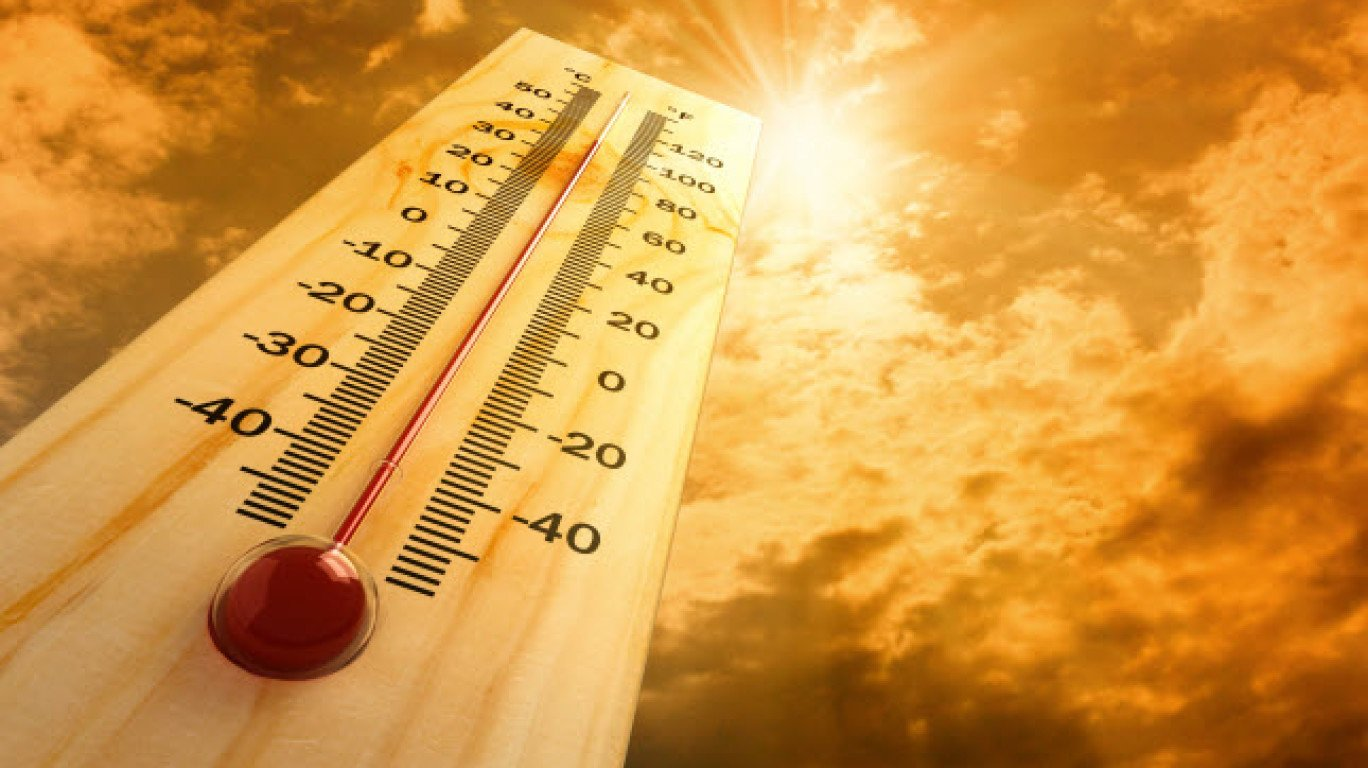

## Importing packages

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Description

[Dataset details](https://www.wunderground.com/history/monthly/in/devanahalli/VOBL/date/2015-12)

## Exploratory Data Analysis (EDA)

In [ ]:
data = pd.read_csv("Temp.csv")

In [ ]:
data.head()

,Time,Temperature,Dew Point,Humidity,Wind Speed,Pressure
0,01-2012,68.35,52.79,64.88,5.32,26.90
1,02-2012,72.57,48.69,52.70,6.02,26.87
2,03-2012,78.23,48.82,43.15,5.75,26.86
3,04-2012,81.29,58.67,51.87,6.40,26.82
4,05-2012,80.61,64.35,61.22,9.23,26.80


In [ ]:
data.tail()

,Time,Temperature,Dew Point,Humidity,Wind Speed,Pressure
119,12-2021,69.26,61.09,78.76,4.85,26.93
120,01-2022,70.95,58.79,70.11,5.52,26.89
121,02-2022,72.31,54.64,60.55,5.79,26.85
122,03-2022,77.29,54.42,51.13,6.06,26.85
123,04-2022,80.68,59.99,55.37,6.35,26.86


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         124 non-null    object 
 1   Temperature  124 non-null    float64
 2   Dew Point    124 non-null    float64
 3   Humidity     124 non-null    float64
 4   Wind Speed   124 non-null    float64
 5   Pressure     124 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.9+ KB


In [ ]:
data.describe()

,Temperature,Dew Point,Humidity,Wind Speed,Pressure
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,76.065000,63.699032,71.102823,7.823952,26.776290
std,4.664483,6.545659,12.633244,2.986870,0.117643
min,67.320000,48.690000,43.000000,2.990000,26.130000
25%,73.210000,59.285000,60.997500,5.672500,26.740000
50%,75.230000,64.670000,74.345000,6.400000,26.795000
75%,79.870000,68.850000,81.205000,9.935000,26.860000
max,89.750000,74.670000,91.640000,15.160000,26.950000


#### Temperature

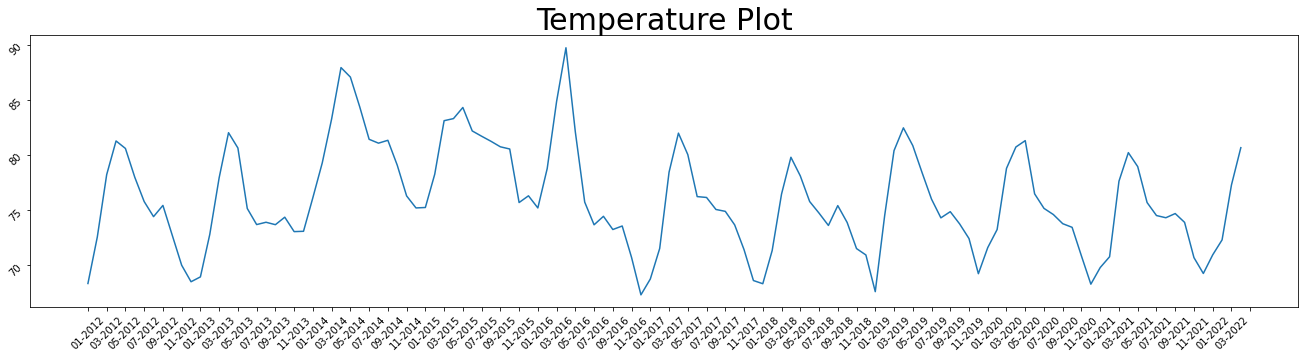

In [ ]:
fig = plt.figure(figsize=(50, 5)) 
ax = fig.add_subplot(122)
plt.title('Temperature Plot', size=30)
ax.set_xticks(np.arange(0, len(data['Time'])+1, 2))
ax.tick_params(labelrotation=45)
plt.plot(data['Time'],data['Temperature']);

The above Time Series plot infers that the temprature increases and decreases for every year and repeats the same pattern for subsequent years hence there is presence of both trend component and seasonal component.  
The data follows Additive model. 
The Temeprature variable , $Z_t$ can be decomposed as function($m_t$,$c_t$,$e_t$).  
That is, $Z_t$ = $m_t$ + $c_t$ + $e_t$

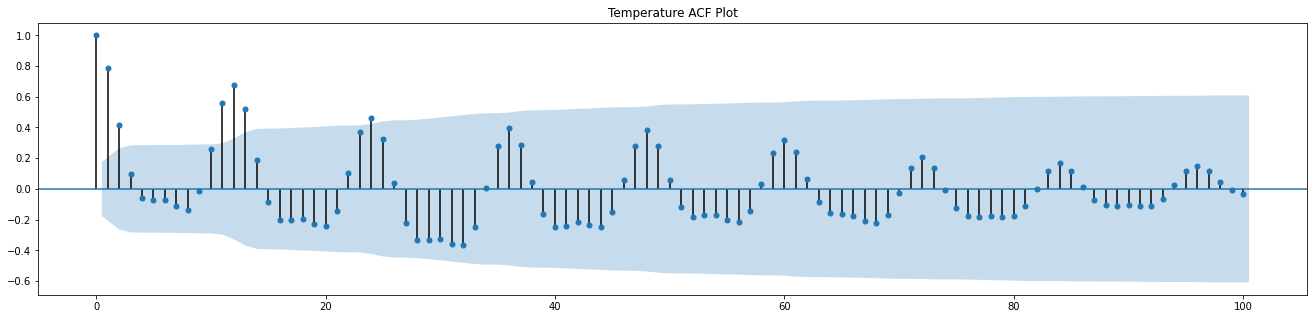

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_acf(data['Temperature'], lags=100,title="Temperature ACF Plot",ax=ax);

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


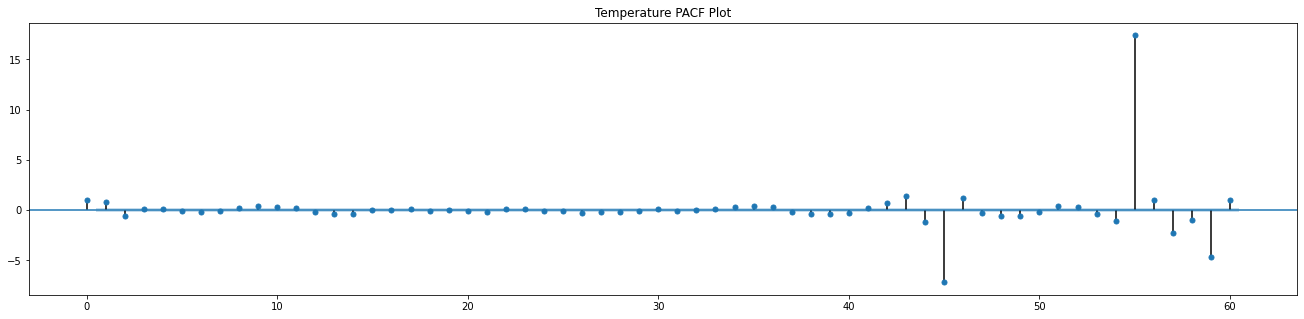

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_pacf(data['Temperature'], lags=60,ax=ax,title="Temperature PACF Plot");

#### Dew Point

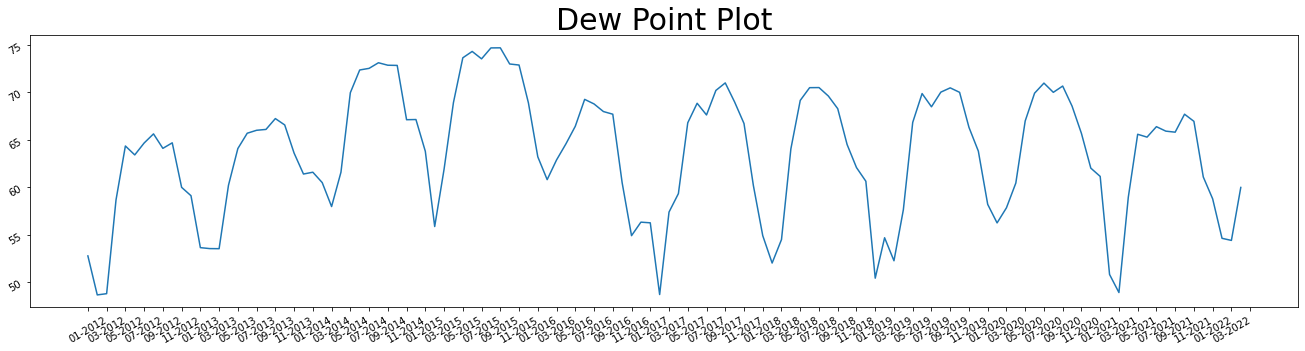

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plt.title('Dew Point Plot', size=30)
ax.set_xticks(np.arange(0, len(data['Time'])+1, 2))
ax.tick_params(labelrotation=30)
plt.plot(data['Time'],data['Dew Point']);

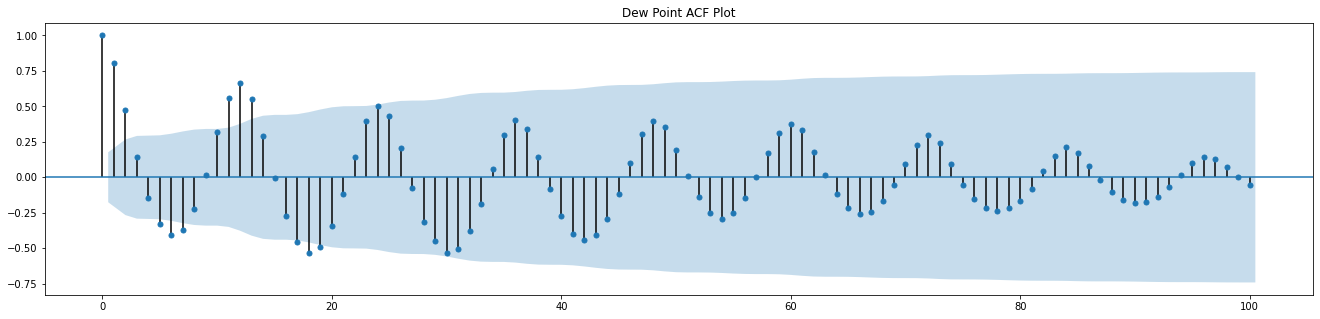

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_acf(data['Dew Point'], lags=100,title="Dew Point ACF Plot",ax=ax);

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


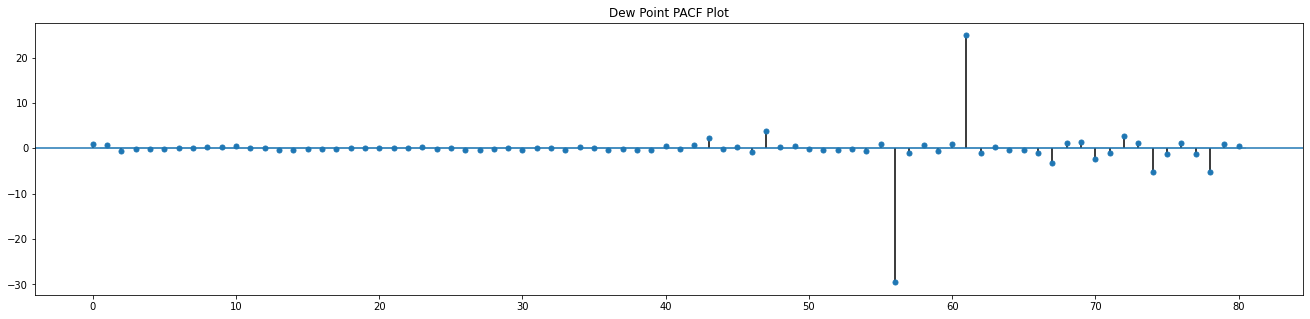

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_pacf(data['Dew Point'], lags=80,title="Dew Point PACF Plot",ax=ax);

#### Humidity

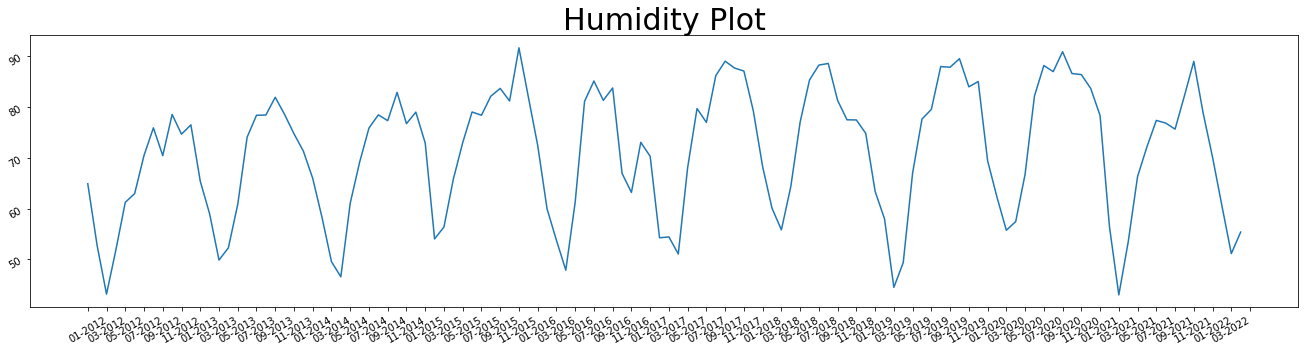

In [ ]:
# Visualize
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plt.title('Humidity Plot', size=30)
ax.set_xticks(np.arange(0, len(data['Time'])+1, 2))
ax.tick_params(labelrotation=30)
plt.plot(data['Time'],data['Humidity']);

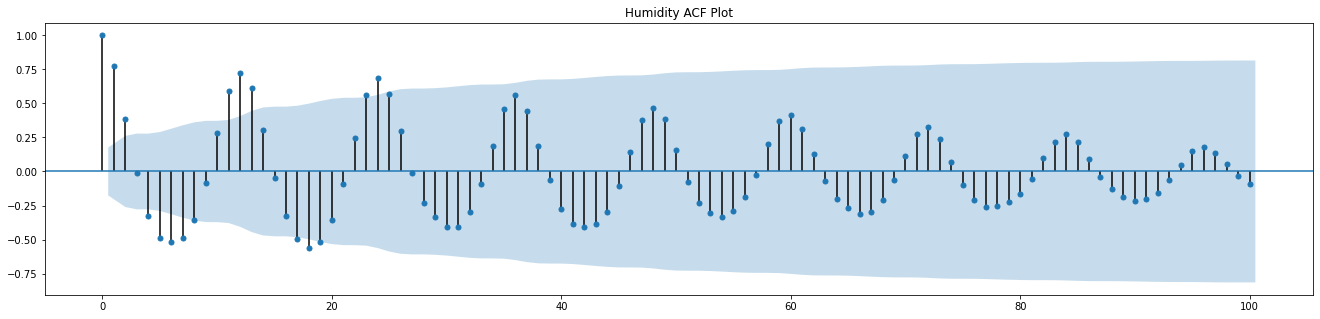

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_acf(data['Humidity'], lags=100,title="Humidity ACF Plot",ax=ax);

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


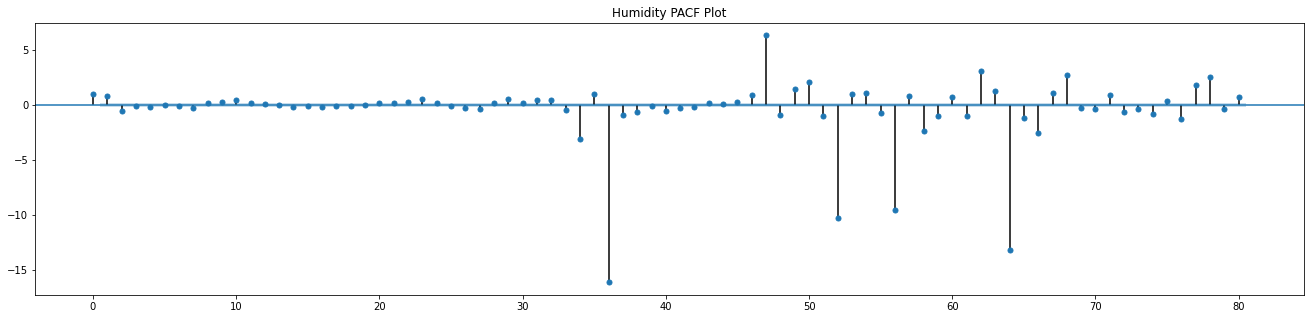

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_pacf(data['Humidity'], lags=80,title="Humidity PACF Plot",ax=ax);

#### Wind Speed

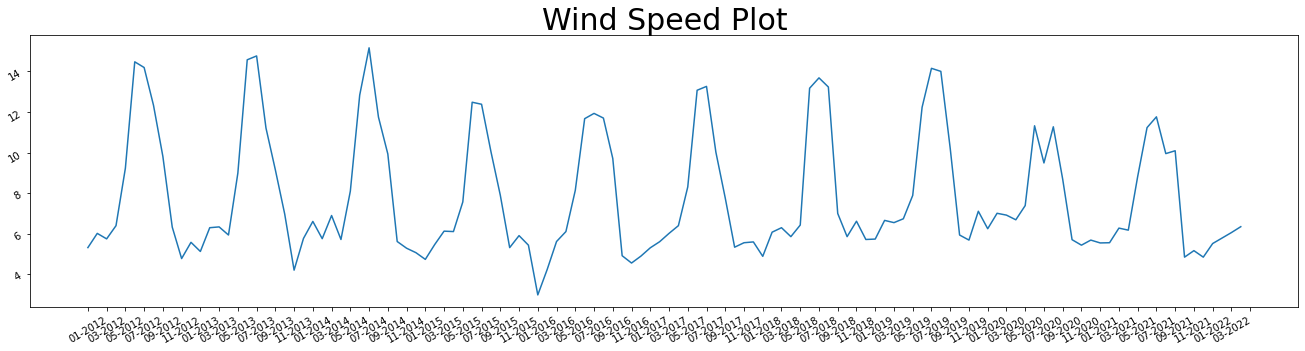

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plt.title('Wind Speed Plot', size=30)
ax.set_xticks(np.arange(0, len(data['Time'])+1, 2))
ax.tick_params(labelrotation=30)
plt.plot(data['Time'],data['Wind Speed']);

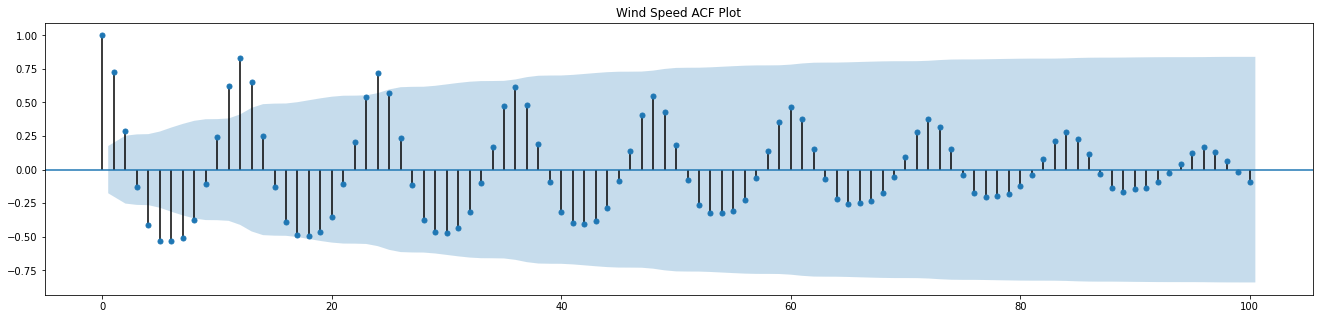

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_acf(data['Wind Speed'], lags=100,title="Wind Speed ACF Plot",ax=ax);

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


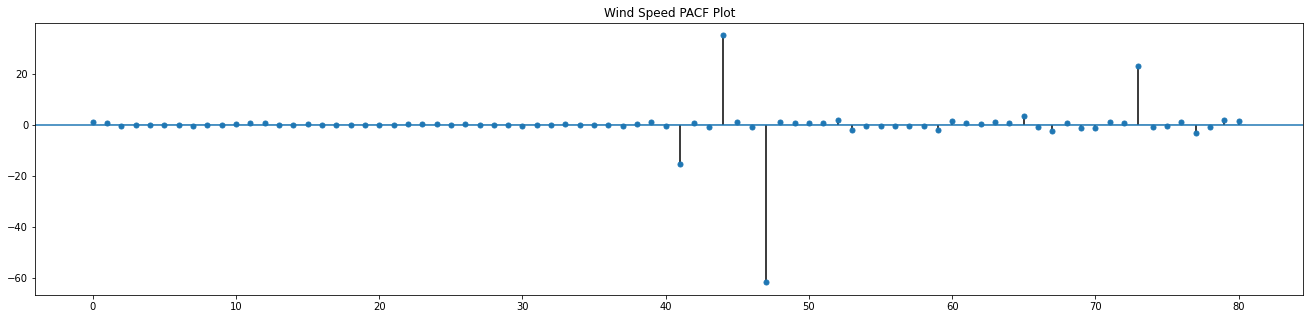

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_pacf(data['Wind Speed'], lags=80,title="Wind Speed PACF Plot",ax=ax);

#### Pressure

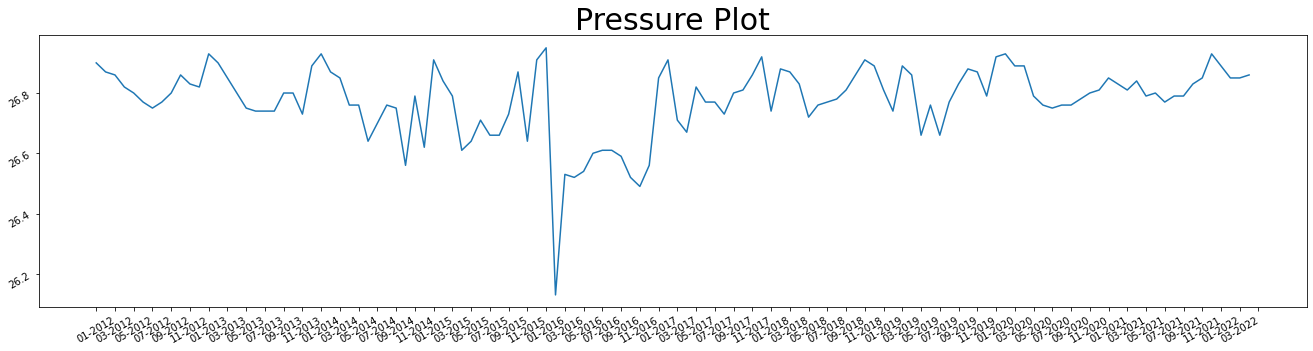

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plt.title('Pressure Plot', size=30)
ax.set_xticks(np.arange(0, len(data['Time'])+1, 2))
ax.tick_params(labelrotation=30)
plt.plot(data['Time'],data['Pressure']);

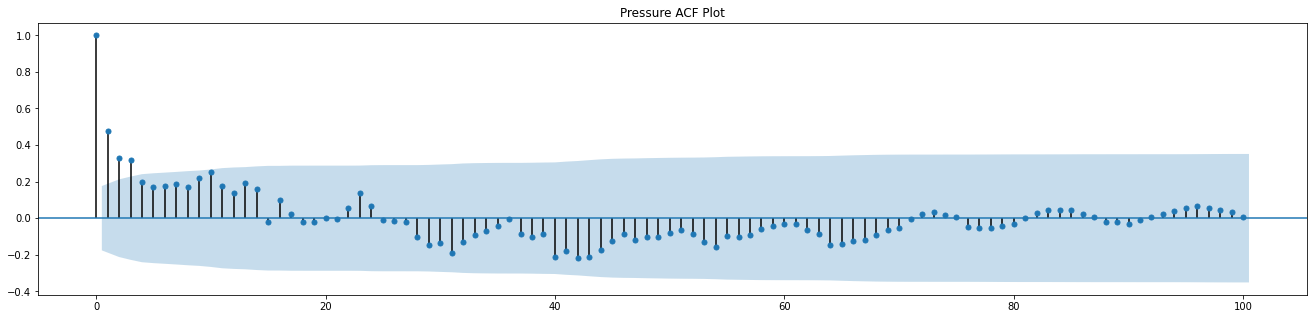

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_acf(data['Pressure'], lags=100,title="Pressure ACF Plot",ax=ax);

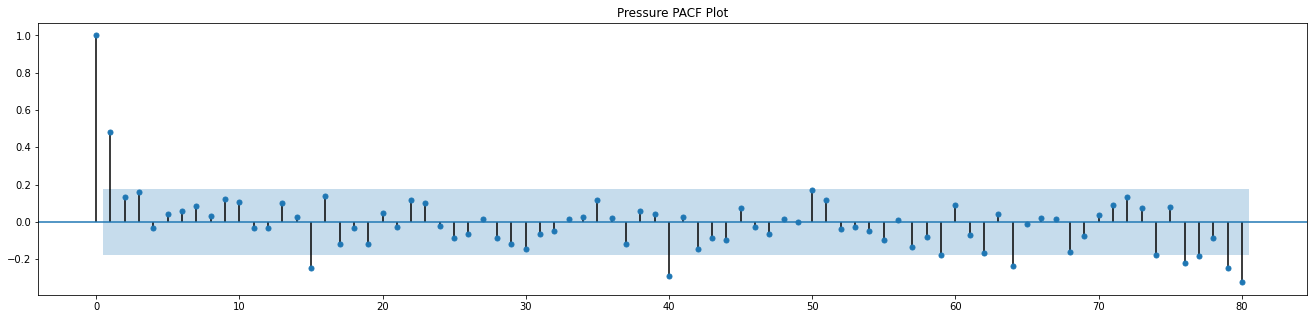

In [ ]:
fig = plt.figure(figsize=(50, 5))
ax = fig.add_subplot(122)
plot_pacf(data['Pressure'], lags=80,title="Pressure PACF Plot",ax=ax);

#### Correlation

             Temperature  Dew Point  Humidity  Wind Speed  Pressure
Temperature     1.000000   0.305395 -0.409166    0.184028 -0.301629
Dew Point       0.305395   1.000000  0.736114    0.515782 -0.325331
Humidity       -0.409166   0.736114  1.000000    0.333331 -0.070111
Wind Speed      0.184028   0.515782  0.333331    1.000000 -0.206524
Pressure       -0.301629  -0.325331 -0.070111   -0.206524  1.000000


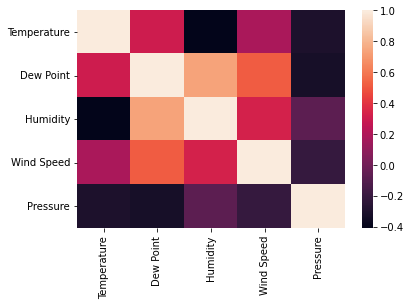

In [ ]:
cor = data.iloc[:,1:]
c1 = cor.corr()
print(c1)
sns.heatmap(c1)

## Univariate Time Series Analysis 

In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data.head()

,Time,Temperature,Dew Point,Humidity,Wind Speed,Pressure
0,2012-01-01,68.35,52.79,64.88,5.32,26.90
1,2012-02-01,72.57,48.69,52.70,6.02,26.87
2,2012-03-01,78.23,48.82,43.15,5.75,26.86
3,2012-04-01,81.29,58.67,51.87,6.40,26.82
4,2012-05-01,80.61,64.35,61.22,9.23,26.80


#### Decomposing data

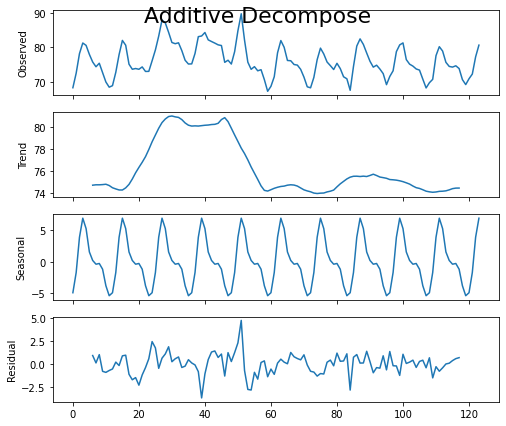

In [ ]:
# Additive Decomposition
result_add = seasonal_decompose(data['Temperature'], model='additive',freq=12)

# Plot
plt.rcParams.update({'figure.figsize': (7,6)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#### Autocorrelation Plot

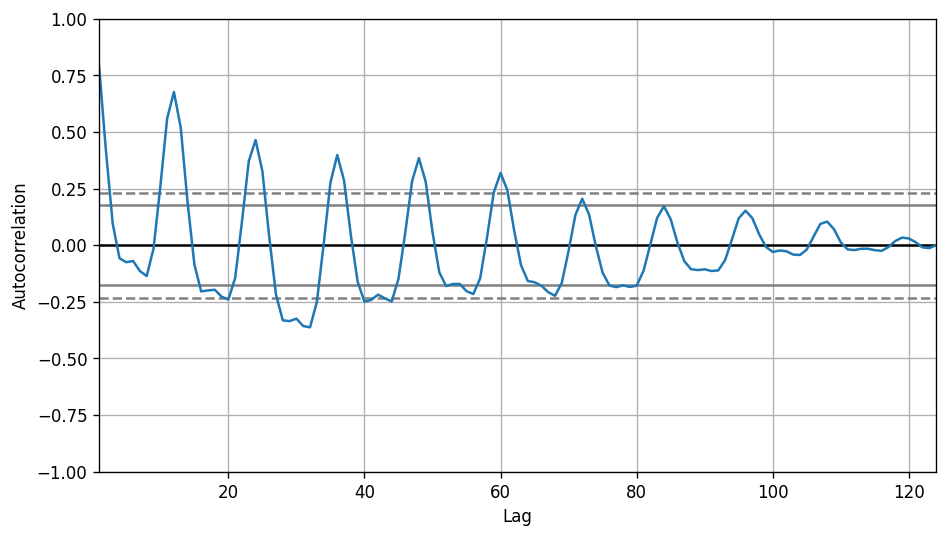

In [ ]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(data.Temperature.tolist())

#### Test for Stationarity 

In [ ]:
Temp = data.loc[:,'Temperature'].values
Temp_res = adfuller(Temp)
print('ADF Statistic: %f' % Temp_res[0])
print('p-value: %f' % Temp_res[1])
print('Critical Values:')
for key, value in Temp_res[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.359104
p-value: 0.153613
Critical Values:
	1%: -3.491
	5%: -2.888
	10%: -2.581


**Hypothesis**  
$H_0$: Data is not Stationary  
$H_1$: Data is Stationary  


The obtained p value is less than 0.05 which implies that the **Temperature** variable is not Stationary.

In [ ]:
Temp = data.loc[: , ["Time","Temperature"]]
Temp.head()

,Time,Temperature
0,2012-01-01,68.35
1,2012-02-01,72.57
2,2012-03-01,78.23
3,2012-04-01,81.29
4,2012-05-01,80.61


In [ ]:
Temp.index = pd.to_datetime(Temp['Time'])
Temp.drop(columns='Time',inplace=True)
Temp.head()

,Temperature
Time,
2012-01-01,68.35
2012-02-01,72.57
2012-03-01,78.23
2012-04-01,81.29
2012-05-01,80.61


In [ ]:
rolling_mean = Temp.rolling(window = 12).mean()
Temp['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


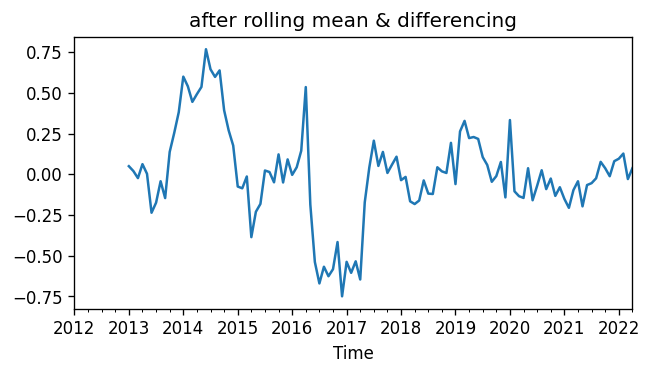

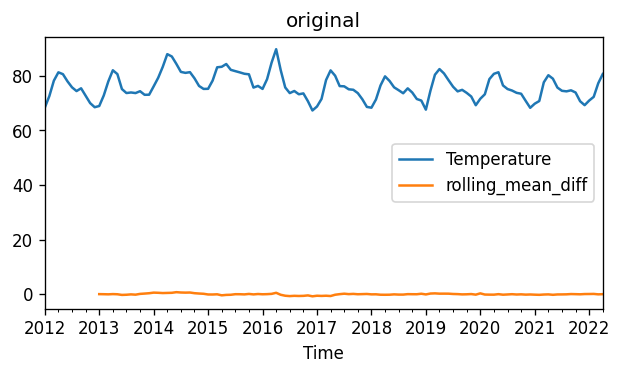

In [ ]:
ax1 = plt.subplot()
Temp['rolling_mean_diff'].plot(title='after rolling mean & differencing',figsize = (6,3));
ax2 = plt.subplot()
Temp.plot(title='original',figsize = (6,3)); 

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(Temp['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.9007011921280315
2. P-Value :  0.3317313197438082
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 99
5. Critical Values :
	 1% :  -3.498198082189098
	 5% :  -2.891208211860468
	 10% :  -2.5825959973472097


#### Estimating the best model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(Temp.Temperature, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=476.807, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=447.275, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=473.162, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=426.446, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.97 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=430.075, Time=0.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=427.306, Time=0.35 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=427.553, Time=0.41 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=425.612, Time=0.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=446.964, Time=0.09 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.58 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=

In [ ]:
# !pip install pmdarima

#### Fitting SARIMAX Model

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(Temp['Temperature'],order=(0, 1, 1),seasonal_order=(2,1,0,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


##### Checking the forecast results on test dataset

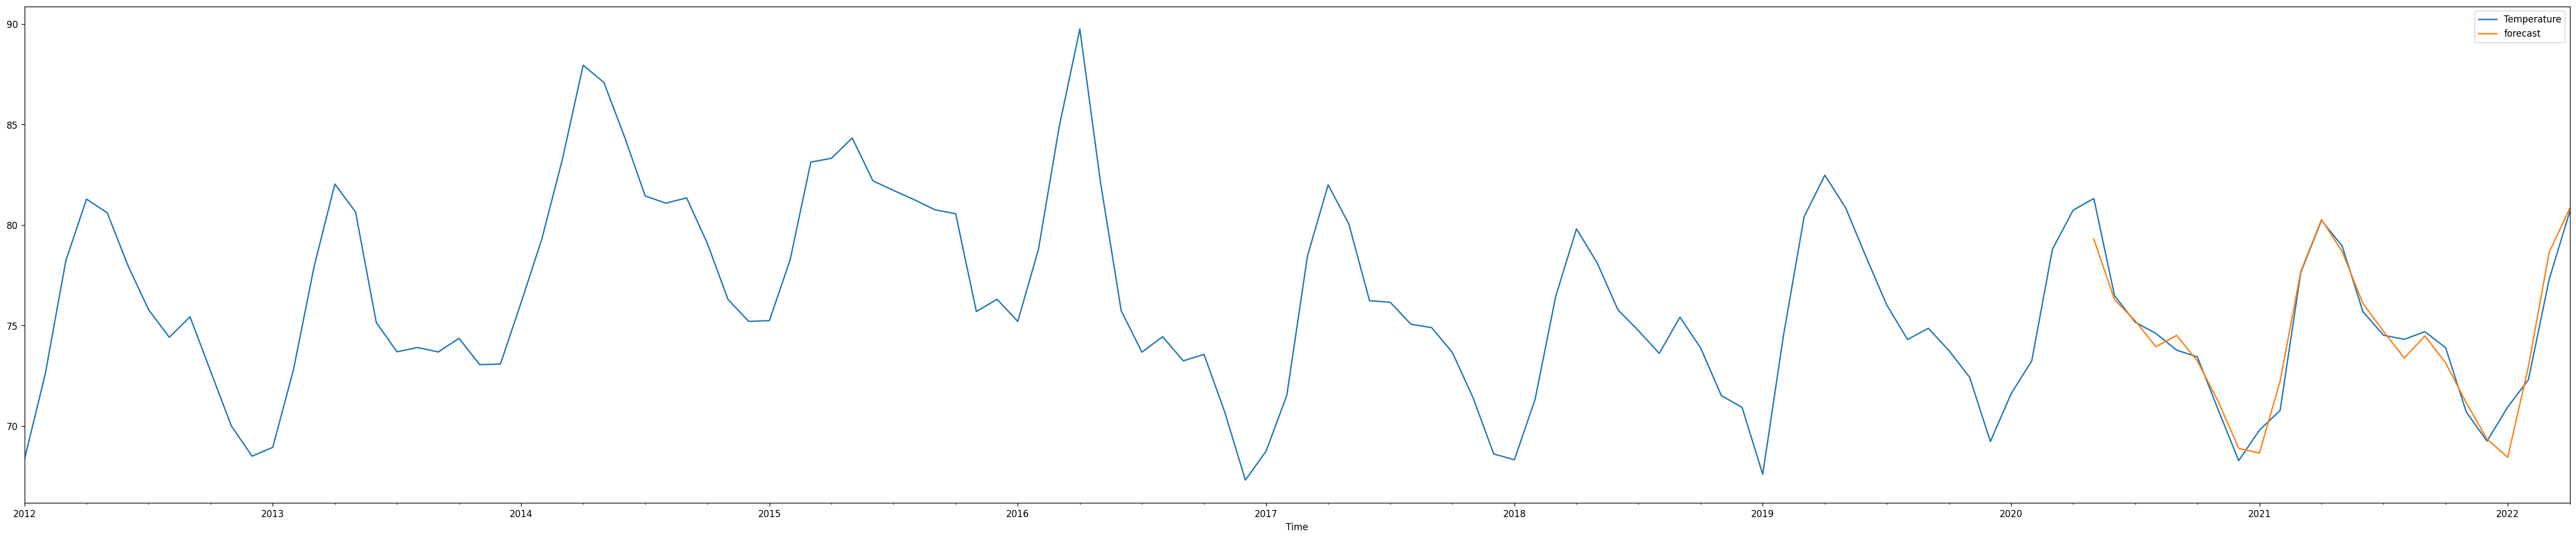

In [ ]:
Temp['forecast']=results.predict(start=100,end=125,dynamic=True)
Temp[['Temperature','forecast']].plot(figsize=(50,10))

In [ ]:
from pandas.tseries.offsets import DateOffset
pred_date=[Temp.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=Temp.columns)

In [ ]:
Temp=pd.concat([Temp,pred_date])

##### Forecasting the next 2 years Temperature values

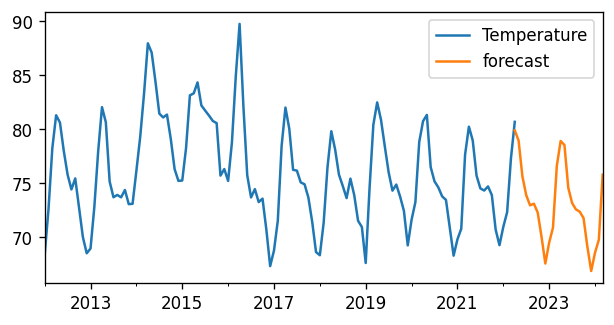

In [ ]:
Temp['forecast'] = results.predict(start = 123, end = 147, dynamic= True)
Temp[['Temperature', 'forecast']].plot(figsize=(6, 3)) 

In [ ]:
Temp['forecast'].tail(24)

2022-04-01    79.890573
2022-05-01    78.946766
2022-06-01    75.626230
2022-07-01    73.888557
2022-08-01    72.949573
2022-09-01    73.097946
2022-10-01    72.284366
2022-11-01    70.041722
2022-12-01    67.563217
2023-01-01    69.500505
2023-02-01    70.884149
2023-03-01    76.590506
2023-04-01    78.903462
2023-05-01    78.533524
2023-06-01    74.577406
2023-07-01    73.162417
2023-08-01    72.575770
2023-09-01    72.361358
2023-10-01    71.759824
2023-11-01    69.114044
2023-12-01    66.870133
2024-01-01    68.559922
2024-02-01    69.763425
2024-03-01    75.781716
Name: forecast, dtype: float64

## Multivariate Time Series Analysis

In [ ]:
data = pd.read_csv("Temp.csv",parse_dates=['Time'], index_col='Time')

#### Testing Causation using Granger’s Causality Test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)        


,Temperature_x,Dew Point_x,Humidity_x,Wind Speed_x,Pressure_x
Temperature_y,1.0000,0.0000,0.0000,0.0000,0.0000
Dew Point_y,0.0000,1.0000,0.0000,0.0000,0.0022
Humidity_y,0.0000,0.0000,1.0000,0.0000,0.0060
Wind Speed_y,0.0000,0.0000,0.0000,1.0000,0.0447
Pressure_y,0.0003,0.0001,0.0047,0.0024,1.0000


#### Cointegration Test

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    
    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
def adjust(val, length= 6): return str(val).ljust(length)

cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Temperature ::  98.33     > 60.0627   =>   True
Dew Point ::  43.91     > 40.1749   =>   True
Humidity ::  19.03     > 24.2761   =>   False
Wind Speed ::  6.52      > 12.3212   =>   False
Pressure ::  0.02      > 4.1296    =>   False


#### Split the Series into Training and Testing Data

In [ ]:
nobs = 12
df_train, df_test = data[0:-nobs], data[-nobs:]

# Check size
print(df_train.shape) 
print(df_test.shape) 

(112, 5)
(12, 5)


#### Check for Stationarity and Make the Time Series Stationary

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Temperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2488
 No. Lags Chosen       = 13
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.189. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Dew Point" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3579
 No. Lags Chosen       = 13
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.154. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Humidity" 
    -----------------------------------------------
 Null Hypothesis: 

In [ ]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Temperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.2651
 No. Lags Chosen       = 12
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.1835. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Dew Point" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6794
 No. Lags Chosen       = 12
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0777. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Humidity" 
    -----------------------------------------------
 Null Hypothesis

In [ ]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [ ]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Temperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.9738
 No. Lags Chosen       = 11
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Dew Point" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.576
 No. Lags Chosen       = 11
 Critical value 1%     = -3.499
 Critical value 5%     = -2.892
 Critical value 10%    = -2.583
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Humidity" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significanc

#### Select the Order (P) of VAR model

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  4.581194254147019
BIC :  5.321932203384398
FPE :  97.68531485637301
HQIC:  4.8815905492478056 

Lag Order = 2
AIC :  3.6601505803278487
BIC :  5.026050742289257
FPE :  39.005186904988555
HQIC:  4.213973484355781 

Lag Order = 3
AIC :  3.266432846194549
BIC :  5.2648095448576555
FPE :  26.515513788242238
HQIC:  4.076548187395479 

Lag Order = 4
AIC :  2.6155101522213267
BIC :  5.253822462426676
FPE :  14.042061616374259
HQIC:  3.684832487927645 

Lag Order = 5
AIC :  1.795971869003202
BIC :  5.0818275406268025
FPE :  6.350469495580755
HQIC:  3.127465409806931 

Lag Order = 6
AIC :  1.4502778331716684
BIC :  5.391437346315059
FPE :  4.681344190362318
HQIC:  3.0469573745453067 

Lag Order = 7
AIC :  1.1730663890179178
BIC :  5.777447145147379
FPE :  3.7690663815829257
HQIC:  3.0379982489510238 

Lag Order = 8
AIC :  0.6570017400016095
BIC :  5.932682394151369
FPE :  2.452842919867072
HQIC:  2.7933047010085232 

Lag Order = 9
AIC :  0.35072657585006795
BIC :  6.3059515

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


#### Train the VAR Model of Selected Order(p)

In [ ]:
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, Apr, 2022
Time:                     12:47:20
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    6.30595
Nobs:                     101.000    HQIC:                   2.76157
Log likelihood:          -504.276    FPE:                    2.03759
AIC:                     0.350727    Det(Omega_mle):        0.311987
--------------------------------------------------------------------
Results for equation Temperature
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.029163         0.168024            0.174           0.862
L1.Temperature        -0.251139         0.397504           -0.632           0.528
L1.Dew Point          -0.620890         0.356843  

#### Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [ ]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(adjust(col), ':', round(val, 2))

Temperature : 2.01
Dew Point : 2.1
Humidity : 2.02
Wind Speed : 2.06
Pressure : 2.19


#### Forecast VAR model using statsmodels

In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]

9


In [ ]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=data.index[-nobs:], columns=data.columns + '_2d')
df_forecast

,Temperature_2d,Dew Point_2d,Humidity_2d,Wind Speed_2d,Pressure_2d
Time,,,,,
2021-05-01,-2.477313,-8.962405,-9.908657,3.370680,0.007216
2021-06-01,-2.237296,3.425158,12.742043,-1.499540,-0.054790
2021-07-01,0.330736,-5.153697,-11.244982,3.215964,-0.015723
2021-08-01,4.266295,0.931507,-6.379268,-6.685134,0.101204
2021-09-01,-4.537999,2.205314,13.081534,-0.876006,-0.179871
2021-10-01,2.123278,-7.101030,-18.504063,1.964769,0.244538
2021-11-01,-1.397541,2.898204,9.958510,-0.702572,-0.062435
2021-12-01,-1.441276,0.693409,1.422441,1.155060,-0.166985
2022-01-01,2.614734,-6.256156,-14.711581,0.869282,0.368512


#### Invert the transformation to get the real forecast

In [ ]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Temperature_forecast', 'Dew Point_forecast', 'Humidity_forecast', 'Wind Speed_forecast',
                   'Pressure_forecast']]


,Temperature_forecast,Dew Point_forecast,Humidity_forecast,Wind Speed_forecast,Pressure_forecast
Time,,,,,
2021-05-01,80.342687,60.017595,53.911343,9.450680,26.877216
2021-06-01,78.218078,64.500347,67.154730,11.221820,26.859643
2021-07-01,76.424205,63.829403,69.153134,16.208925,26.826347
2021-08-01,78.896626,64.089965,64.772270,14.510895,26.894255
2021-09-01,76.831049,66.555840,73.472940,11.936860,26.782292
2021-10-01,76.888749,61.920686,63.669548,11.327594,26.914868
2021-11-01,75.548909,60.183736,63.824665,10.015756,26.985009
2021-12-01,72.767792,59.140195,65.402224,9.858979,26.888165
2022-01-01,72.601410,51.840498,52.268201,10.571483,27.159833


#### Plot of Forecast vs Actuals

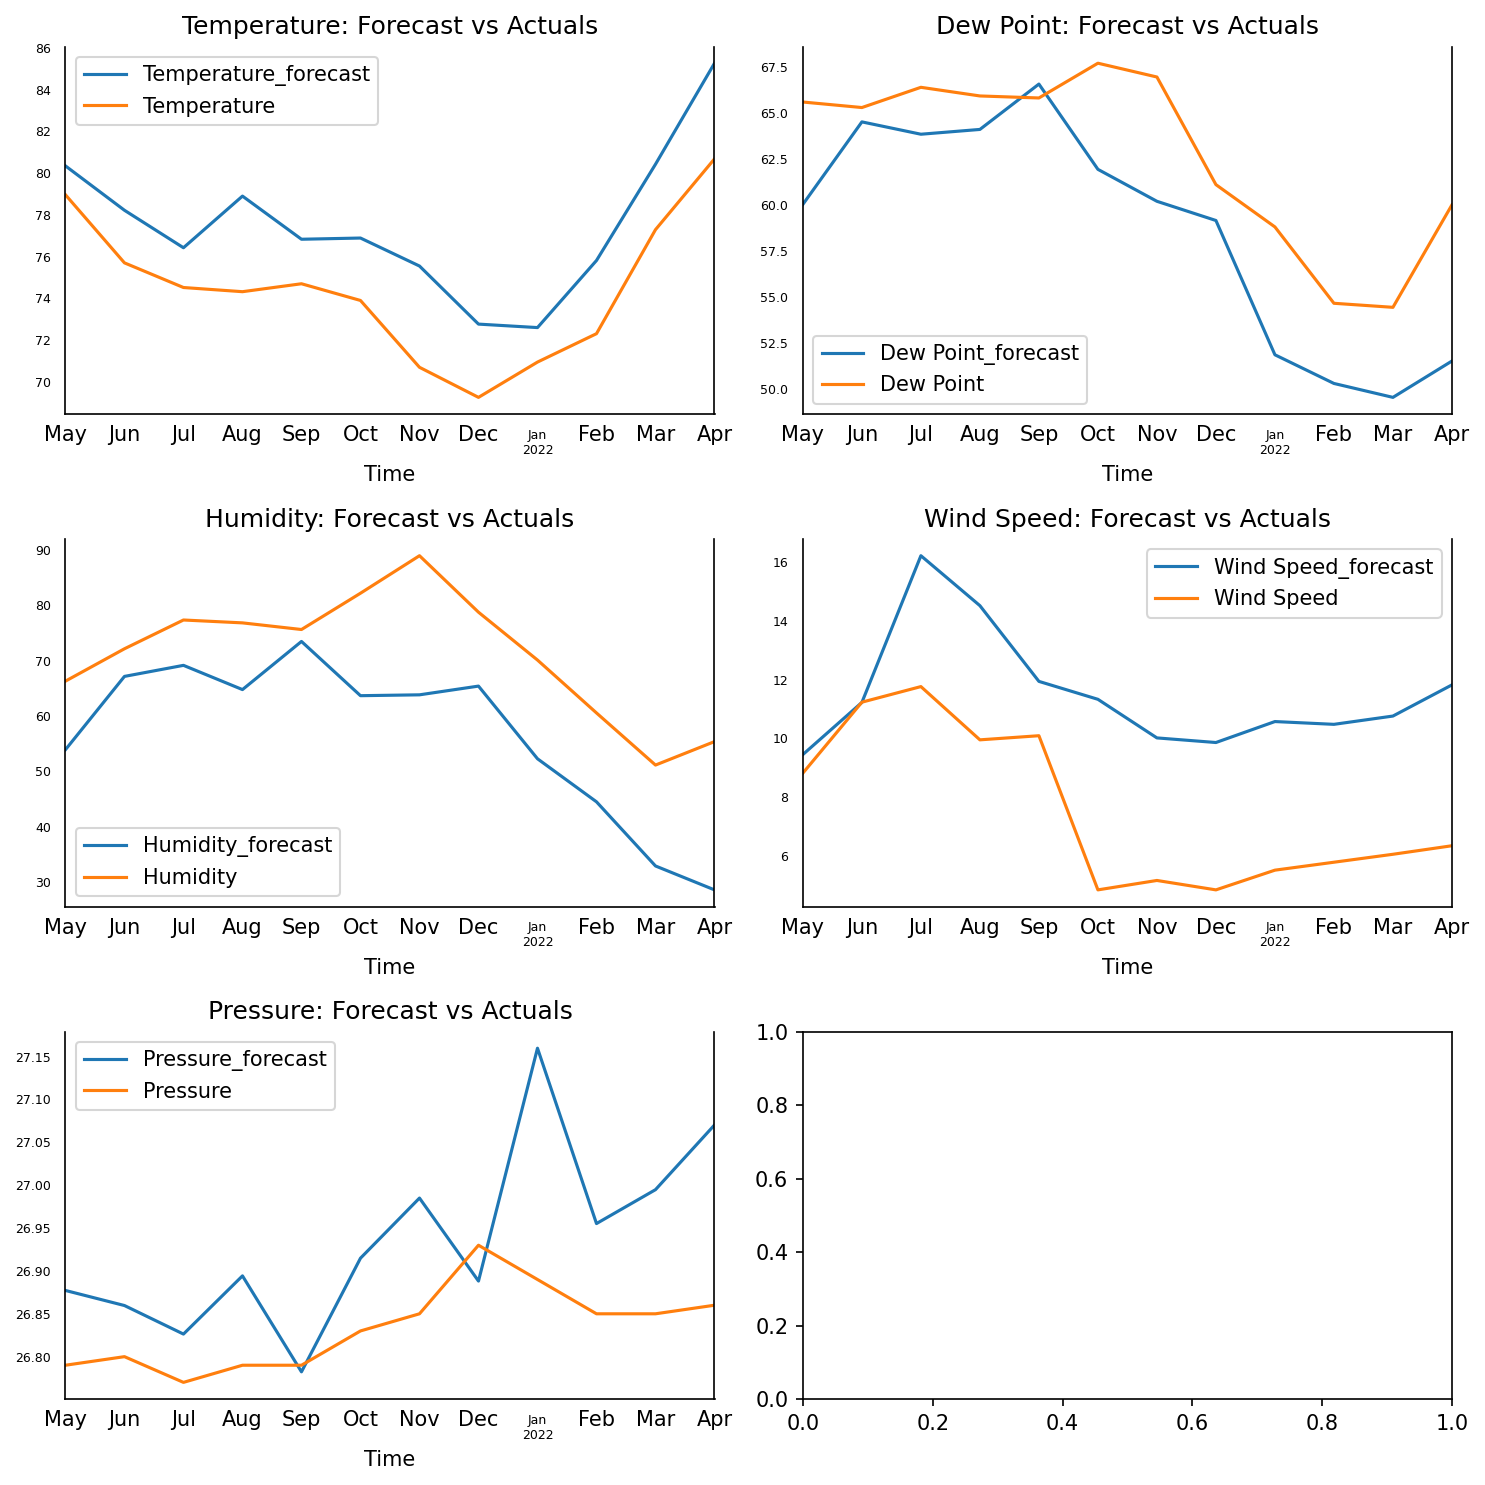

In [ ]:
import math
fig, axes = plt.subplots(nrows=int(math.ceil(len(data.columns)/2)), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(data.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

#### Evaluate the Forecasts

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Temperature')
accuracy_prod = forecast_accuracy(df_results['Temperature_forecast'].values, df_test['Temperature'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Dew Point')
accuracy_prod = forecast_accuracy(df_results['Dew Point_forecast'].values, df_test['Dew Point'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Humidity')
accuracy_prod = forecast_accuracy(df_results['Humidity_forecast'].values, df_test['Humidity'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Wind Speed')
accuracy_prod = forecast_accuracy(df_results['Wind Speed_forecast'].values, df_test['Wind Speed'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Pressure')
accuracy_prod = forecast_accuracy(df_results['Pressure_forecast'].values, df_test['Pressure'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Temperature
mape   :  0.0413
me     :  3.0604
mae    :  3.0604
mpe    :  0.0413
rmse   :  3.2647
corr   :  0.941
minmax :  0.0394

Forecast Accuracy of: Dew Point
mape   :  0.0685
me     :  -4.0937
mae    :  4.2196
mpe    :  -0.0666
rmse   :  4.8989
corr   :  0.8993
minmax :  0.0685

Forecast Accuracy of: Humidity
mape   :  0.2155
me     :  -14.6469
mae    :  14.6469
mpe    :  -0.2155
rmse   :  16.2702
corr   :  0.8658
minmax :  0.2155

Forecast Accuracy of: Wind Speed
mape   :  0.6465
me     :  3.9763
mae    :  3.9777
mpe    :  0.6464
rmse   :  4.4195
corr   :  0.6514
minmax :  0.3499

Forecast Accuracy of: Pressure
mape   :  0.0041
me     :  0.1007
mae    :  0.1089
mpe    :  0.0038
rmse   :  0.1296
corr   :  0.619
minmax :  0.004


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


#### Model for full dataset

In [ ]:
# 1st difference
df_differenced1 = data.diff().dropna()

In [ ]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Temperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4404
 No. Lags Chosen       = 12
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.1307. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Dew Point" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.9152
 No. Lags Chosen       = 12
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0436. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Humidity" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. 

In [ ]:
# Second Differencing
df_differenced1 = df_differenced1.diff().dropna()

In [ ]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced1.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Temperature" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.722
 No. Lags Chosen       = 11
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Dew Point" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.3103
 No. Lags Chosen       = 11
 Critical value 1%     = -3.491
 Critical value 5%     = -2.888
 Critical value 10%    = -2.581
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Humidity" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
model1 = VAR(df_differenced1)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model1.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  4.404208710806607
BIC :  5.0973799204586925
FPE :  81.82769309334932
HQIC:  4.685731965426592 

Lag Order = 2
AIC :  3.4449410718392293
BIC :  4.722541453947667
FPE :  31.422418716876912
HQIC:  3.9637804824525738 

Lag Order = 3
AIC :  3.0472937789314294
BIC :  4.915612093628257
FPE :  21.231478490298507
HQIC:  3.8059588680704644 

Lag Order = 4
AIC :  2.3820453196315565
BIC :  4.84748502784253
FPE :  11.036401932522743
HQIC:  3.3830865278180093 

Lag Order = 5
AIC :  1.6052960861635617
BIC :  4.674378235938846
FPE :  5.170655567244771
HQIC:  2.851305581662774 

Lag Order = 6
AIC :  1.2427121981258473
BIC :  4.922078401759351
FPE :  3.7032286840968505
HQIC:  2.7363247007111555 

Lag Order = 7
AIC :  1.0159639621601504
BIC :  5.312379467424368
FPE :  3.0792593623245517
HQIC:  2.759857580676928 

Lag Order = 8
AIC :  0.6409996323794473
BIC :  5.561356491334463
FPE :  2.2464176305221923
HQIC:  2.637896715833883 

Lag Order = 9
AIC :  0.3472066684048958
BIC :  5.898527

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fitted = model1.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 26, Apr, 2022
Time:                     12:50:59
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    5.89853
Nobs:                     113.000    HQIC:                   2.59987
Log likelihood:          -591.317    FPE:                    1.81751
AIC:                     0.347207    Det(Omega_mle):        0.329521
--------------------------------------------------------------------
Results for equation Temperature
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.011295         0.149730            0.075           0.940
L1.Temperature        -0.499965         0.342835           -1.458           0.145
L1.Dew Point          -0.441391         0.312141  

In [ ]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input1 = df_differenced1.values[-lag_order:]

9


In [ ]:
fc = model_fitted.forecast(y=forecast_input1, steps=24)
df_forecast = pd.DataFrame(fc, index=data.index[-24:], columns=data.columns + '_2d')
df_forecast

,Temperature_2d,Dew Point_2d,Humidity_2d,Wind Speed_2d,Pressure_2d
Time,,,,,
2020-05-01,-4.138412,0.677620,6.178626,1.329378,-0.011965
2020-06-01,-2.488278,-6.836662,-4.953054,1.053945,-0.060091
2020-07-01,1.438178,2.077851,0.946893,-1.083158,-0.025156
2020-08-01,2.235538,0.473763,-2.009977,-1.553463,0.212723
2020-09-01,-0.078973,-2.611947,-5.994875,-2.635073,-0.054678
2020-10-01,-1.671267,-0.099676,1.449718,0.146418,-0.147980
2020-11-01,-0.248643,-1.808044,-0.907678,1.343429,0.093851
2020-12-01,-0.226691,-0.073898,-0.868205,1.687943,0.009172
2021-01-01,1.881355,0.062920,-3.736765,-0.134284,-0.005439


In [ ]:
y = np.array(df_differenced1)

In [ ]:
a = model_fitted.forecast(y,12)

In [ ]:
df2 = pd.DataFrame(a, columns = ['Temperature_2d','Dew Point_2d','Humidity_2d','Wind Speed_2d','Pressure_2d']) 
df2

,Temperature_2d,Dew Point_2d,Humidity_2d,Wind Speed_2d,Pressure_2d
0,-4.138412,0.677620,6.178626,1.329378,-0.011965
1,-2.488278,-6.836662,-4.953054,1.053945,-0.060091
2,1.438178,2.077851,0.946893,-1.083158,-0.025156
3,2.235538,0.473763,-2.009977,-1.553463,0.212723
4,-0.078973,-2.611947,-5.994875,-2.635073,-0.054678
5,-1.671267,-0.099676,1.449718,0.146418,-0.147980
6,-0.248643,-1.808044,-0.907678,1.343429,0.093851
7,-0.226691,-0.073898,-0.868205,1.687943,0.009172
8,1.881355,0.062920,-3.736765,-0.134284,-0.005439
9,1.976747,-0.737796,-3.070791,0.208283,0.028132


In [ ]:
df_results1 = invert_transformation(data, df2, second_diff=True)        
df_results1.loc[:, ['Temperature_forecast', 'Dew Point_forecast', 'Humidity_forecast', 'Wind Speed_forecast',
                   'Pressure_forecast']]

,Temperature_forecast,Dew Point_forecast,Humidity_forecast,Wind Speed_forecast,Pressure_forecast
0,79.931588,66.237620,65.788626,7.969378,26.858035
1,76.694899,65.648578,71.254199,10.642702,26.795978
2,74.896386,67.137387,77.666664,12.232867,26.708765
3,75.333412,69.099959,82.069152,12.269570,26.834275
4,75.691464,68.450584,80.476765,9.671199,26.905107
5,74.378250,67.701532,80.334096,7.219246,26.827959
6,72.816392,65.144437,79.283749,6.110722,26.844661
7,71.027845,62.513444,77.365198,6.690142,26.870536
8,71.120652,59.945371,71.709882,7.135277,26.890972
9,73.190207,56.639503,62.983775,7.788696,26.939540


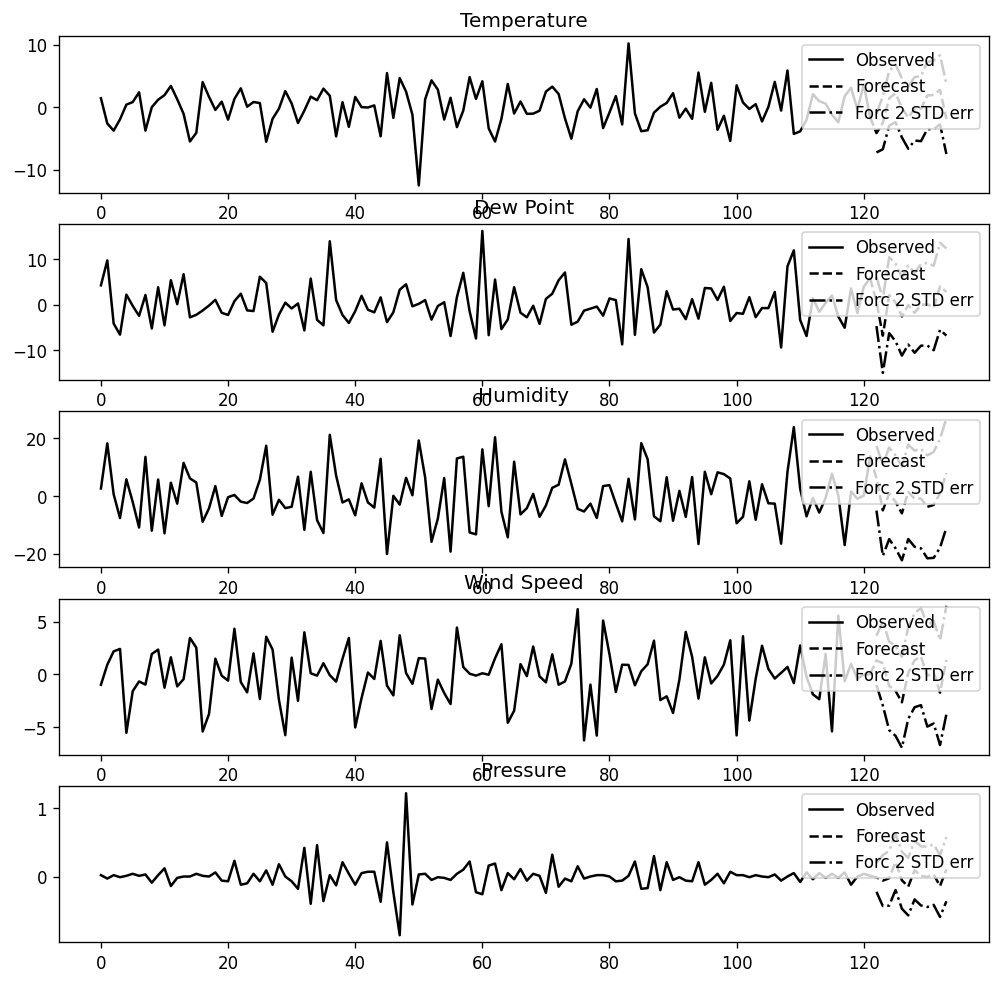

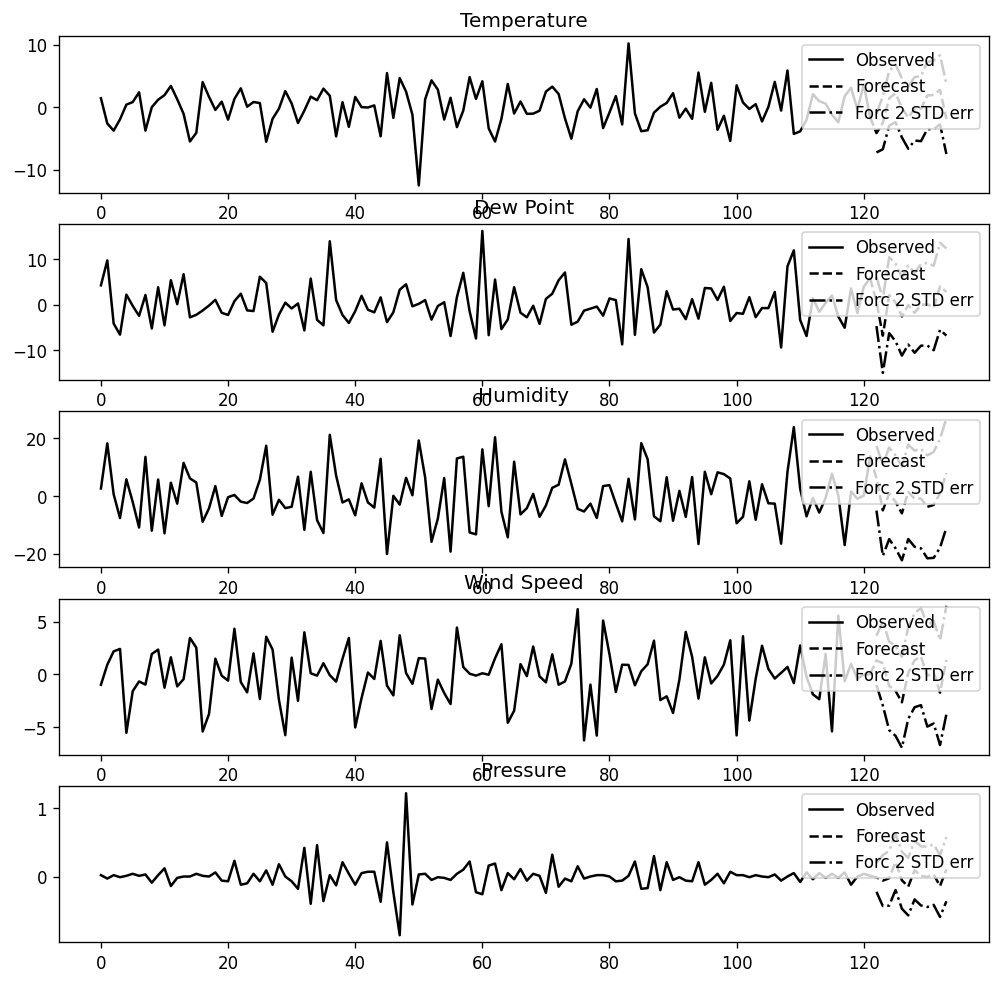

In [ ]:
model_fitted.plot_forecast(12)

In [ ]:
df3 = pd.concat([data, df_results1], axis = 0)

In [ ]:
df3.head()

,Temperature,Dew Point,Humidity,Wind Speed,Pressure,Temperature_2d,Dew Point_2d,Humidity_2d,Wind Speed_2d,Pressure_2d,Temperature_1d,Temperature_forecast,Dew Point_1d,Dew Point_forecast,Humidity_1d,Humidity_forecast,Wind Speed_1d,Wind Speed_forecast,Pressure_1d,Pressure_forecast
2012-01-01 00:00:00,68.35,52.79,64.88,5.32,26.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-01 00:00:00,72.57,48.69,52.70,6.02,26.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-01 00:00:00,78.23,48.82,43.15,5.75,26.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-01 00:00:00,81.29,58.67,51.87,6.40,26.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-01 00:00:00,80.61,64.35,61.22,9.23,26.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3.tail()

,Temperature,Dew Point,Humidity,Wind Speed,Pressure,Temperature_2d,Dew Point_2d,Humidity_2d,Wind Speed_2d,Pressure_2d,Temperature_1d,Temperature_forecast,Dew Point_1d,Dew Point_forecast,Humidity_1d,Humidity_forecast,Wind Speed_1d,Wind Speed_forecast,Pressure_1d,Pressure_forecast
7,NaN,NaN,NaN,NaN,NaN,-0.226691,-0.073898,-0.868205,1.687943,0.009172,-1.788548,71.027845,-2.630993,62.513444,-1.918551,77.365198,0.579419,6.690142,0.025875,26.870536
8,NaN,NaN,NaN,NaN,NaN,1.881355,0.062920,-3.736765,-0.134284,-0.005439,0.092807,71.120652,-2.568073,59.945371,-5.655316,71.709882,0.445136,7.135277,0.020436,26.890972
9,NaN,NaN,NaN,NaN,NaN,1.976747,-0.737796,-3.070791,0.208283,0.028132,2.069554,73.190207,-3.305869,56.639503,-8.726107,62.983775,0.653419,7.788696,0.048568,26.939540
10,NaN,NaN,NaN,NaN,NaN,2.791579,4.024359,0.990599,-1.721559,-0.138938,4.861134,78.051340,0.718490,57.357993,-7.735508,55.248267,-1.068140,6.720556,-0.090370,26.849169
11,NaN,NaN,NaN,NaN,NaN,-1.877932,2.756066,7.986292,1.365333,0.107234,2.983201,81.034542,3.474556,60.832549,0.250784,55.499051,0.297193,7.017750,0.016863,26.866033
